# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [ ]:
# see the pre-defined styles provided.
plt.style.available

In [ ]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [27]:
np.random.seed(123)
df = pd.DataFrame({'A': np.random.randn(365),
                  'B' : df['A'].cumsum(0),
                  'C' : df['B'] + 20},
                 index=pd.date_range('1/1/2017', periods=365))

In [29]:
df.head()

,A,B,C
2017-01-01,-1.085631,-1.085631,18.914369
2017-01-02,0.997345,-0.088285,19.911715
2017-01-03,0.282978,0.194693,20.194693
2017-01-04,-1.506295,-1.311601,18.688399
2017-01-05,-0.578600,-1.890202,18.109798


In [55]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()
df['A'].nunique()

365

<IPython.core.display.Javascript object>


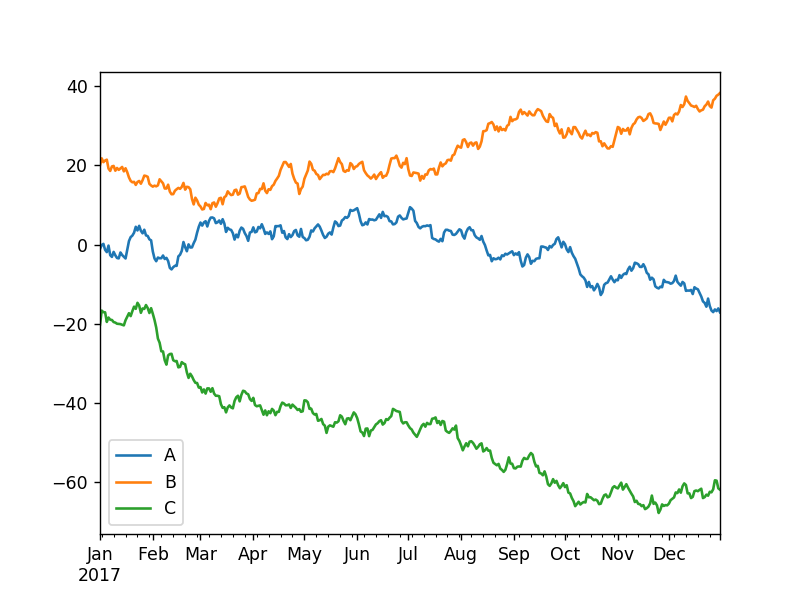

In [31]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

<IPython.core.display.Javascript object>


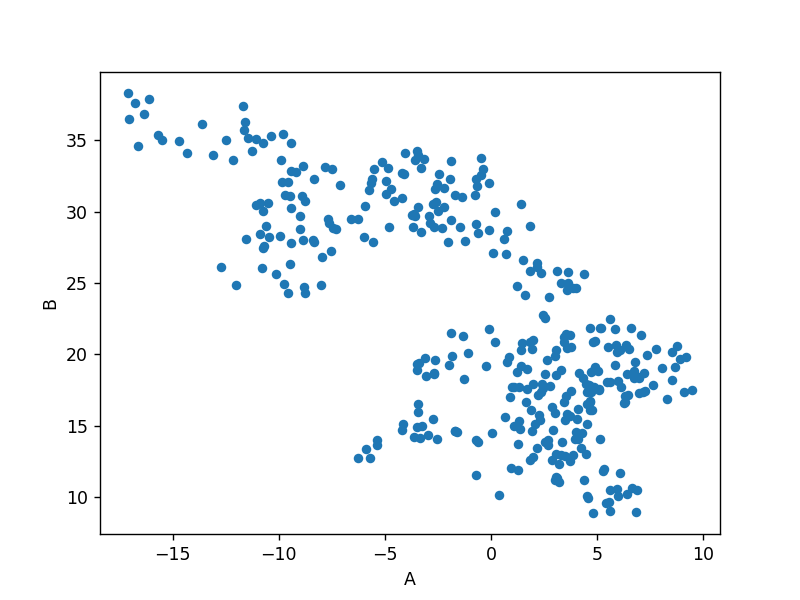

In [33]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


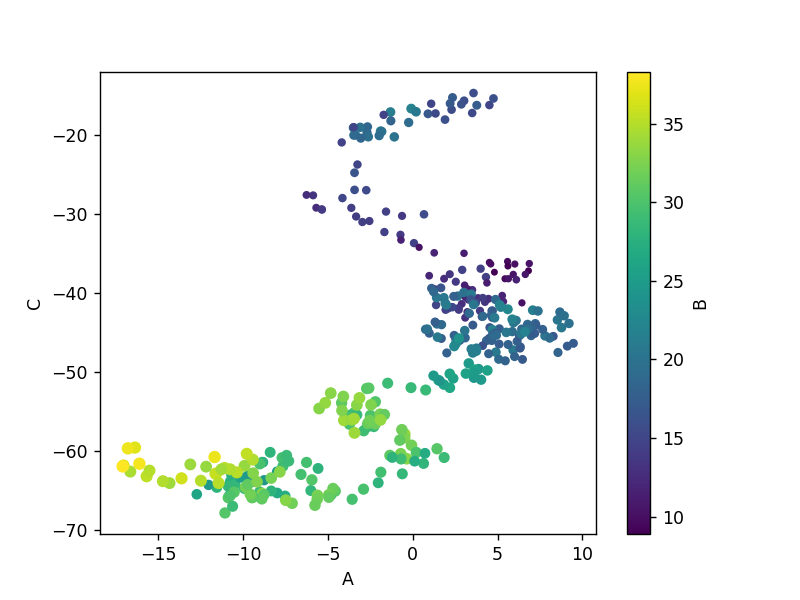

In [44]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

In [ ]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

In [ ]:
df.plot.box();

In [ ]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

In [ ]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [60]:
iris = pd.read_csv('iris.csv')
iris.head()
#iris['Name'].nunique()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
pd.tools.plotting.scatter_matrix(iris);

<IPython.core.display.Javascript object>


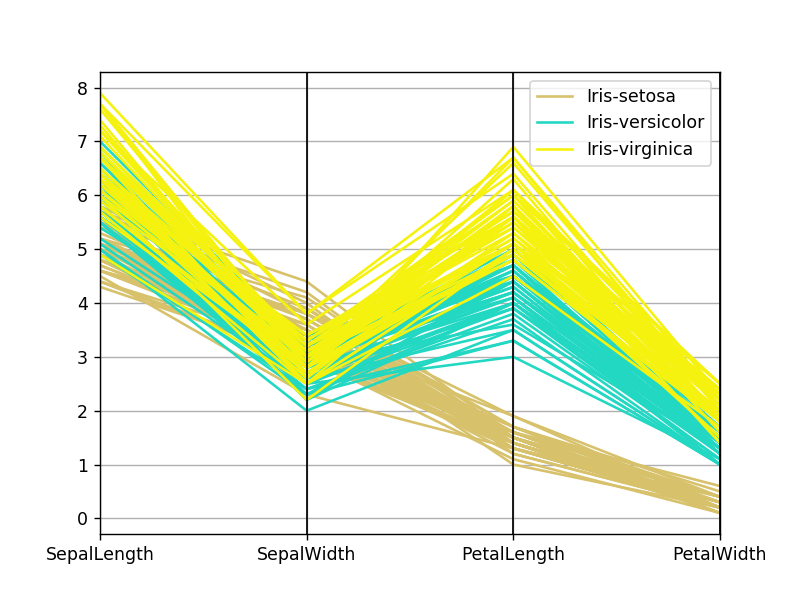

In [69]:
plt.figure()
plt.clf()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates
df2 = pd.DataFrame([["line 1",20,30,100],\
    ["line 2",10,40,90],["line 2",11,42,95],["line 3",10,35,120]],\
    columns=["element","var 1","var 2","var 3"])
plt.clf()
parallel_coordinates(df2,"element")


# Seaborn

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [ ]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

In [ ]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

In [ ]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

In [ ]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

In [ ]:
sns.jointplot(v1, v2, alpha=0.4);

In [ ]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

In [ ]:
sns.jointplot(v1, v2, kind='hex');

In [ ]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

In [ ]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);